In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%pip install plotly 
%pip install matplotlib
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score


# Cargar el conjunto de datos
df = pd.read_csv("../data/processed/clientes_banco.csv")

# extraigo la variable a predecir
x = df.drop('permanencia', axis=1) 
y = df['permanencia']  


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

arbol_decision = Pipeline(steps=[ ('scale', StandardScaler()),  ('DT', DecisionTreeClassifier(random_state=42))])

f1_cross_val_scores = cross_val_score(arbol_decision,x_train,y_train,cv=5,scoring='f1')

fig = make_subplots(rows=1, cols=1,shared_xaxes=True,subplot_titles=('Arbol de decisión score'))
fig.add_trace(
    go.Scatter(x=list(range(0,len(f1_cross_val_scores))),y=f1_cross_val_scores,name='Arbol de decisión'),
    row=1, col=1
)

fig.update_layout(height=500, width=900, title_text="Validación cruzada")
fig.update_yaxes(title_text="F1 Score")
fig.show()

In [3]:
arbol_decision.fit(x_train, y_train)

# Hacer predicciones en el conjunto de datos de prueba
arbol_decision_predicion= arbol_decision.predict(x_test)


fig = go.Figure(data=[go.Table(header=dict(values=['<b>Modelo<b>', '<b>F1 Score<b>']),                 
cells=dict(values=[['<b>Arbol de prediccion<b>'], [np.round(f1(arbol_decision_predicion,y_test),2)]]))])
fig.update_layout(title='Resultados')
fig.show()


In [4]:
# Vamos a calcular una metrica mas de exactitud, que mide la proporción de instancias correctamente clasificadas por el modelo.
arbol_decision.fit(x_train, y_train)
y_pred = arbol_decision.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9354166666666667


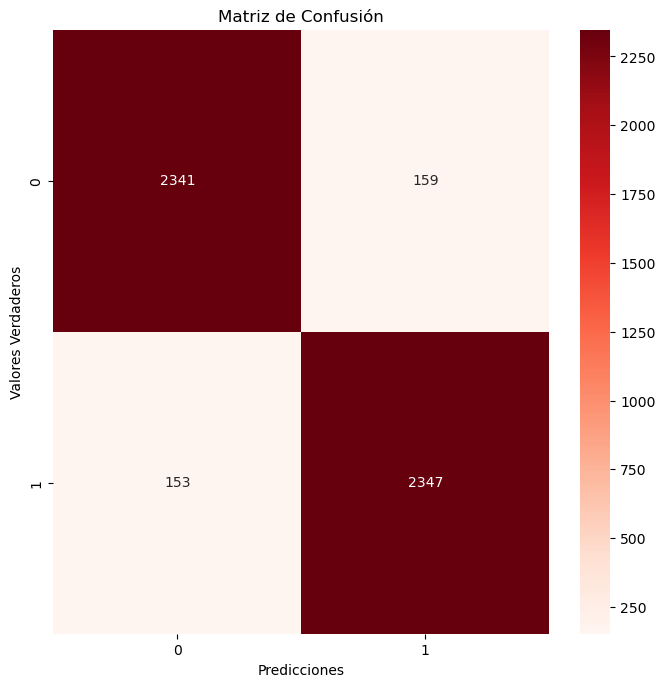

In [5]:
#PREDICCION REAL
df_datos_para_predecir = pd.read_csv("../data/processed/datos_para_predecir.csv")

x = df_datos_para_predecir.drop("permanencia", axis=1)
y = df_datos_para_predecir["permanencia"]

prediccion_real= arbol_decision.predict(x)

matriz_confusion = confusion_matrix(y, prediccion_real)

fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
sns.heatmap(matriz_confusion, annot=True, cmap='Reds', ax=ax, fmt='d')

plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()